In [1]:
# read material data
import csv
import numpy as np

# read Si 
lambdas_lumerical = np.array(np.genfromtxt('Si_eps_re.txt', delimiter=',', skip_header=3, usecols=(0,)))
eps_re = np.array(np.genfromtxt('Si_eps_re.txt', delimiter=',', skip_header=3, usecols=(1,)))
eps_im = np.array(np.genfromtxt('Si_eps_im.txt', delimiter=',', skip_header=3, usecols=(1,)))

ordering = lambdas_lumerical.argsort()
si_lumerical_data = np.array([
    lambdas_lumerical[ordering],
    eps_re[ordering],
    eps_im[ordering]
])

# read SiO2
lambdas_lumerical = np.array(np.genfromtxt('SiO2_eps_re.txt', delimiter=',', skip_header=3, usecols=(0,)))
eps_re = np.array(np.genfromtxt('SiO2_eps_re.txt', delimiter=',', skip_header=3, usecols=(1,)))
eps_im = np.array(np.genfromtxt('SiO2_eps_im.txt', delimiter=',', skip_header=3, usecols=(1,)))

ordering = lambdas_lumerical.argsort()
sio2_lumerical_data = np.array([
    lambdas_lumerical[ordering],
    eps_re[ordering],
    eps_im[ordering]
])

# fit Si
from tidy3d.plugins.dispersion import FastDispersionFitter, AdvancedFastFitterParam

# max/min wavelengths
wvl_max = 1.65
wvl_min = 1.45
ind_1 = len(si_lumerical_data[0][si_lumerical_data[0] < wvl_min]) - 0
ind_2 = len(si_lumerical_data[0][si_lumerical_data[0] < wvl_max]) + 0
fitter_si = FastDispersionFitter.from_complex_permittivity(
    wvl_um=si_lumerical_data[0][ind_1:ind_2], 
    eps_real=si_lumerical_data[1][ind_1:ind_2], 
    eps_imag=si_lumerical_data[2][ind_1:ind_2]
)

fitter_si = fitter_si.copy(update={"wvl_range": (wvl_min, wvl_max)})
advanced_param = AdvancedFastFitterParam(weights=(1,1), passivity_num_iters=100, loss_bounds=(0, 1e-15))
#advanced_param = AdvancedFastFitterParam(weights=(1,1), passivity_num_iters=100, relaxed=True, logspacing=False, loss_bounds=(-1e-15, 1e-15))
Si_lumerical, rms_error = fitter_si.fit(max_num_poles=15, advanced_param=advanced_param, tolerance_rms=1e-5)


# fit SiO2
ind_1 = len(sio2_lumerical_data[0][sio2_lumerical_data[0] < wvl_min]) - 1
ind_2 = len(sio2_lumerical_data[0][sio2_lumerical_data[0] < wvl_max]) + 1
fitter_sio2 = FastDispersionFitter.from_complex_permittivity(
    wvl_um=sio2_lumerical_data[0][ind_1:ind_2], 
    eps_real=sio2_lumerical_data[1][ind_1:ind_2], 
    eps_imag=sio2_lumerical_data[2][ind_1:ind_2]
)

fitter_sio2 = fitter_sio2.copy(update={"wvl_range": (wvl_min, wvl_max)})
advanced_param = AdvancedFastFitterParam(weights=(1,1), passivity_num_iters=100)
advanced_param = AdvancedFastFitterParam(weights=(1,1), passivity_num_iters=100, relaxed=True, logspacing=False)
SiO2_lumerical, rms_error = fitter_sio2.fit(max_num_poles=20, advanced_param=advanced_param, tolerance_rms=2e-5)

Output()

12:33:09 CEST WARNING: Unable to fit with weighted RMS error under              
              'tolerance_rms' of 1e-05                                          

Output()

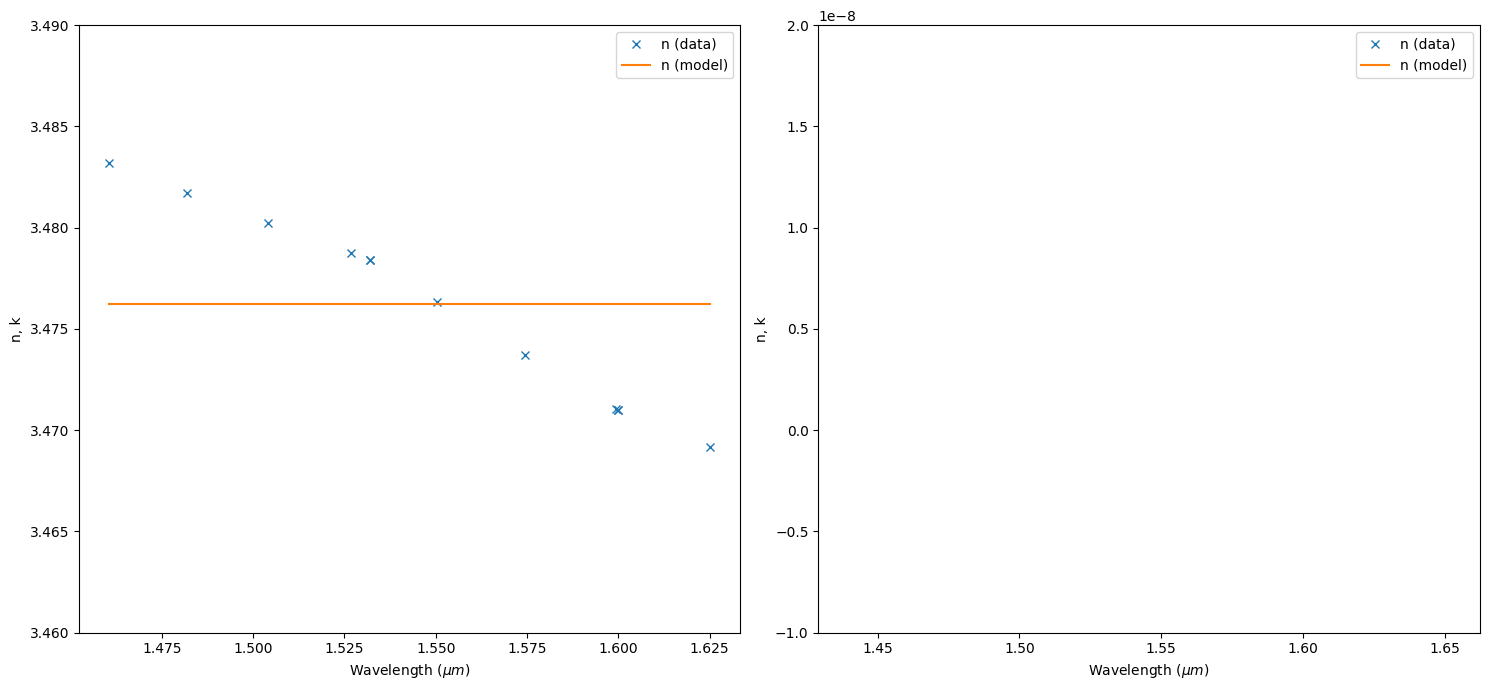

In [2]:
import matplotlib.pyplot as plt
_, ax = plt.subplots(1, 2, figsize=(15, 7))
fitter_si.plot(Si_lumerical, ax=ax[0])
#ax[0].set_ylim([-1e-8,2e-8])
ax[0].set_ylim([3.46,3.49])

fitter_sio2.plot(SiO2_lumerical, ax=ax[1])
ax[1].set_ylim([-1e-8,2e-8])
plt.tight_layout()
plt.show()

In [3]:
# save data to json
Si_lumerical.to_file("fitted_si.json")
SiO2_lumerical.to_file("fitted_sio2.json")

In [4]:
import tidy3d as td
print(fitter_si.lossy)
print(Si_lumerical.eps_model(frequency=td.C_0 / 1.55))
print(Si_lumerical.nk_model(frequency=td.C_0 / 1.55))

False
(12.084089138615916+2.840550844153558e-19j)
(3.4762176483379053, 4.0856918805295746e-20)
